In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset=pd.read_csv('Secondary_school_dropout_dataset.csv')

In [3]:
df=dataset.copy()

In [4]:
df.head()

,location_name,home_language,hh_occupation,hh_edu,hh_size,school_distanceKm,age,gender,mothers_edu,grade,meansToSchool,hh_children,dropout
0,Rural,English,Unemployed,Secondary,More than five,1-2 km,11.0,Male,Primary,Form Two,Walk,More than five,No
1,Urban,English,Unemployed,Primary,More than five,2-3 km,11.0,Male,Primary,Form One,Walk,More than five,Yes
2,Urban,Kiswahili,Self-employed,Secondary,More than five,4-5 km,11.0,Female,Secondary,Form Two,Public transport,More than five,No
3,Urban,Kiswahili,Unemployed,Secondary,More than five,More than 11 km,11.0,Male,Primary,Form One,Walk,Five Children,No
4,Urban,Kiswahili,Self-employed,Secondary,More than five,4-5 km,NaN,Female,Secondary,Form One,Public transport,More than five,No


In [5]:
df['location_name'].unique()

array(['Rural', 'Urban'], dtype=object)

In [6]:
df['home_language'].unique()

array(['English', 'Kiswahili', 'Native language', nan], dtype=object)

In [7]:
print(df['hh_occupation'].unique())
print(df['hh_edu'].unique())
print(df['hh_size'].unique())
print(df['school_distanceKm'].unique())
print(df['age'].unique())
print(df['gender'].unique())
print(df['mothers_edu'].unique())
print(df['grade'].unique())
print(df['meansToSchool'].unique())
print(df['hh_children'].unique())
print(df['dropout'].unique())

['Unemployed' 'Self-employed' 'Agriculture' 'Public sector' 'Housewife'
 'Private sector' nan]
['Secondary' 'Primary' 'Postsecondary' nan]
['More than five' 'Five Children' 'Four Children' 'Three Children'
 'Two Children']
['1-2 km' '2-3 km' '4-5 km' 'More than 11 km' '0-0.5 km' '6-7 km'
 '0.5-1 km' '7-10 km']
[11. nan 12. 13. 14. 15. 16.]
['Male' 'Female']
['Primary' 'Secondary' nan 'Postsecondary']
['Form Two' 'Form One' 'Form Three' 'Form Four']
['Walk' 'Public transport' 'Bicycle/motorbike' 'Private car']
['More than five' 'Five Children' 'Four Children' 'Three Children'
 'Two Children']
['No' 'Yes']


In [8]:
df.columns

Index(['location_name', 'home_language', 'hh_occupation', 'hh_edu', 'hh_size',
       'school_distanceKm', 'age', 'gender', 'mothers_edu', 'grade',
       'meansToSchool', 'hh_children', 'dropout'],
      dtype='object')

# Categorical Attributes of the data

In [9]:
df.describe()

,age
count,62649.000000
mean,15.511708
std,0.721693
min,11.000000
25%,15.000000
50%,16.000000
75%,16.000000
max,16.000000


In [10]:
df.describe(include='O')

,location_name,home_language,hh_occupation,hh_edu,hh_size,school_distanceKm,gender,mothers_edu,grade,meansToSchool,hh_children,dropout
count,62739,62736,62735,3161,62739,62739,62739,30730,62739,62739,62739,62739
unique,2,3,6,3,5,8,2,3,4,4,5,2
top,Rural,English,Unemployed,Primary,More than five,2-3 km,Female,Primary,Form One,Walk,Three Children,No
freq,62710,58486,55122,2851,46969,62057,35055,29156,40119,56763,15315,57032


# Data cleaning

In [11]:
df.isnull().sum()

location_name            0
home_language            3
hh_occupation            4
hh_edu               59578
hh_size                  0
school_distanceKm        0
age                     90
gender                   0
mothers_edu          32009
grade                    0
meansToSchool            0
hh_children              0
dropout                  0
dtype: int64

In [12]:
df.drop('hh_edu',axis='columns',inplace=True)

In [13]:
df.drop('mothers_edu',axis='columns',inplace=True)

In [14]:
df.columns

Index(['location_name', 'home_language', 'hh_occupation', 'hh_size',
       'school_distanceKm', 'age', 'gender', 'grade', 'meansToSchool',
       'hh_children', 'dropout'],
      dtype='object')

In [15]:
df.isnull().sum()

location_name         0
home_language         3
hh_occupation         4
hh_size               0
school_distanceKm     0
age                  90
gender                0
grade                 0
meansToSchool         0
hh_children           0
dropout               0
dtype: int64

In [16]:
df['home_language']=df['home_language'].astype(str)

In [17]:
df['home_language'].dtype

dtype('O')

In [18]:
attbr,counts=np.unique(df['home_language'],return_counts=True)
most_freq_attbr=attbr[np.argmax(counts,axis=0)]
df['home_language'][df['home_language']=='nan']=most_freq_attbr

In [19]:
df['home_language'].unique()

array(['English', 'Kiswahili', 'Native language'], dtype=object)

In [20]:
df['hh_occupation']=df['hh_occupation'].astype(str)

In [21]:
attbr,counts=np.unique(df['hh_occupation'],return_counts=True)
most_freq_attbr=attbr[np.argmax(counts,axis=0)]
df['hh_occupation'][df['hh_occupation']=='nan']=most_freq_attbr

In [22]:
df['hh_occupation'].unique()

array(['Unemployed', 'Self-employed', 'Agriculture', 'Public sector',
       'Housewife', 'Private sector'], dtype=object)

In [23]:
age_value=np.mean(df['age'])
age_value

15.511708087918402

In [24]:
df.age.fillna(age_value,inplace=True)

In [25]:
df.age.unique()

array([11.        , 15.51170809, 12.        , 13.        , 14.        ,
       15.        , 16.        ])

In [26]:
df.isnull().sum()

location_name        0
home_language        0
hh_occupation        0
hh_size              0
school_distanceKm    0
age                  0
gender               0
grade                0
meansToSchool        0
hh_children          0
dropout              0
dtype: int64

# Univariate Analysis

# Location Name

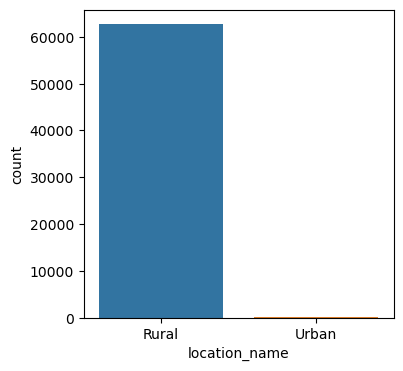

In [27]:
plt.figure(figsize=(4,4))
sns.countplot(x='location_name',data=df)
plt.show()

In [28]:
df.columns

Index(['location_name', 'home_language', 'hh_occupation', 'hh_size',
       'school_distanceKm', 'age', 'gender', 'grade', 'meansToSchool',
       'hh_children', 'dropout'],
      dtype='object')

# Home language

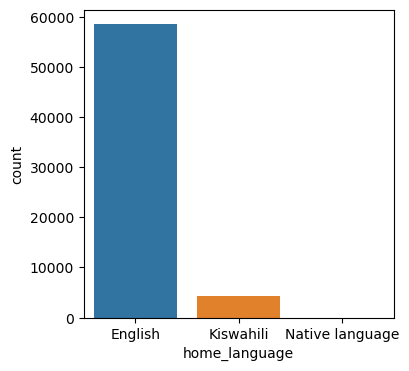

In [29]:
plt.figure(figsize=(4,4))
sns.countplot(x='home_language',data=df)
plt.show()

# Occupation

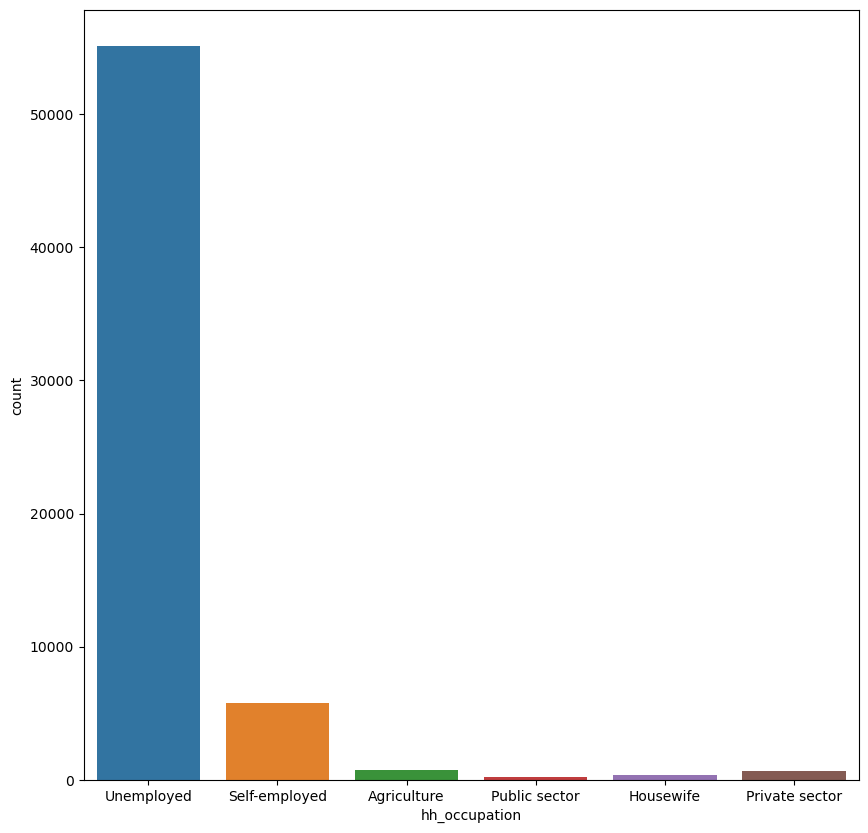

In [30]:
plt.figure(figsize=(10,10))
sns.countplot(x='hh_occupation',data=df)
plt.show()

# hh_size

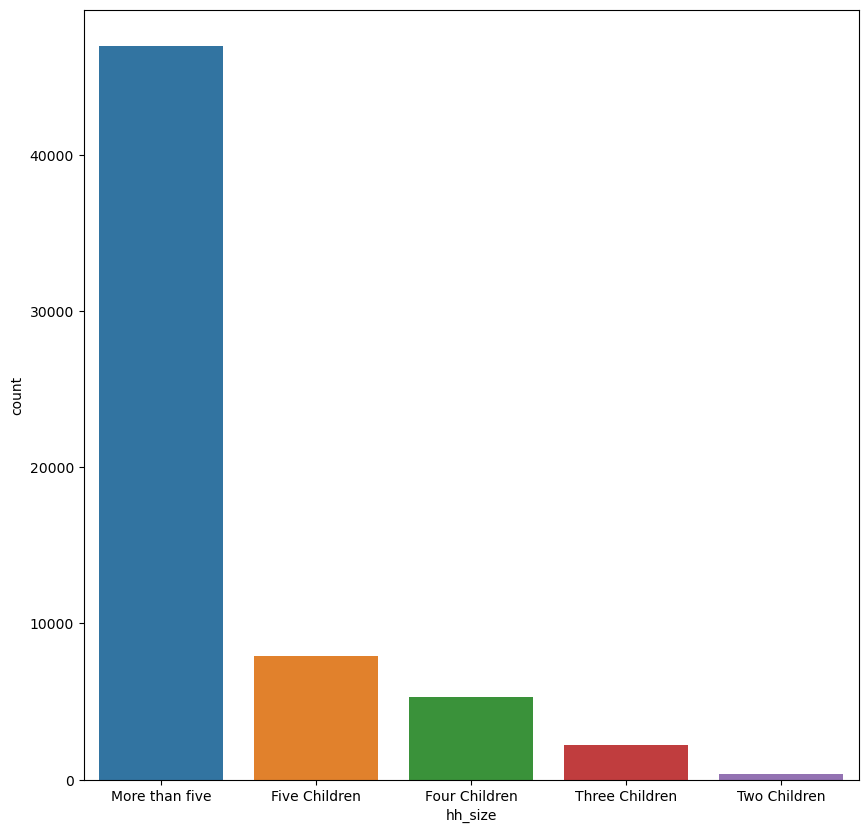

In [31]:
plt.figure(figsize=(10,10))
sns.countplot(x='hh_size',data=df)
plt.show()

# SchoolDistancekm

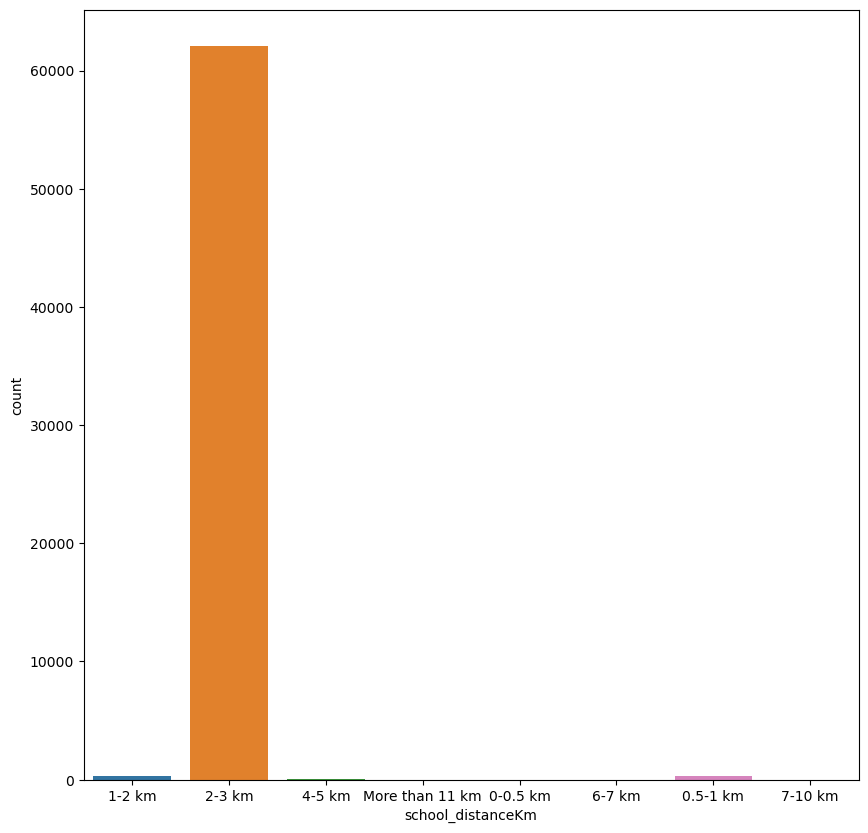

In [32]:
plt.figure(figsize=(10,10))
sns.countplot(x='school_distanceKm',data=df)
plt.show()

# Age

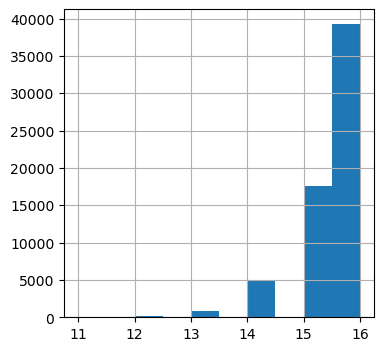

In [33]:
df.age.hist(figsize=(4,4))
plt.show()

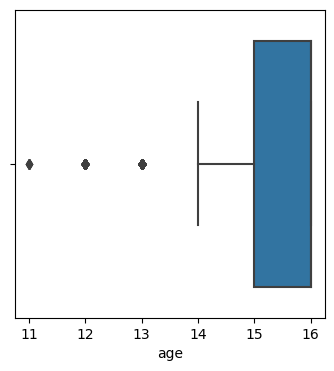

In [34]:
plt.figure(figsize=(4,4))
sns.boxplot(x='age',data=df)
plt.show()

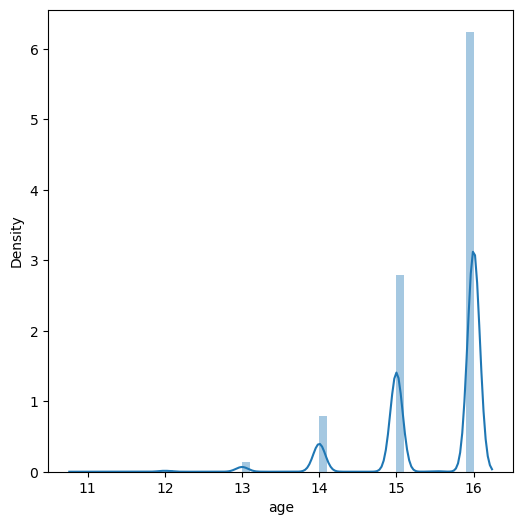

(62739, 11)


In [35]:
plt.figure(figsize=(6,6))
sns.distplot(df['age'])
plt.show()
print(df.shape)

In [36]:
q3=df.age.quantile(0.75)
q1=df.age.quantile(0.25)

iqr=q3-q1

upperthreshold=q3+1.5*iqr
lowerthreshold=q1-1.5*iqr

df=df[(df.age<upperthreshold) & (df.age>lowerthreshold)]
df.shape


(61731, 11)

# Gender

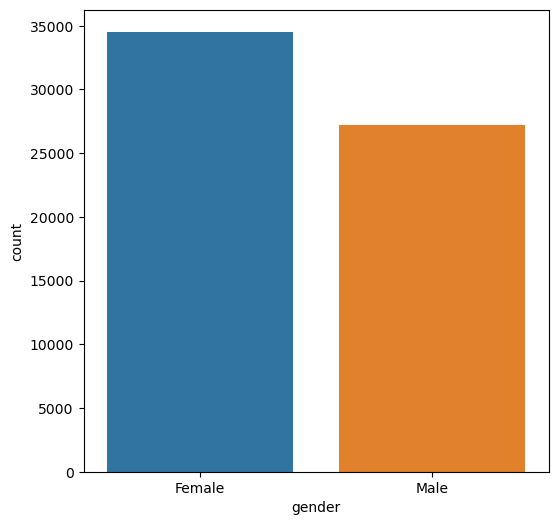

In [37]:
plt.figure(figsize=(6,6))
sns.countplot(x='gender',data=df)
plt.show()

In [38]:
df['gender'].value_counts()

gender
Female    34532
Male      27199
Name: count, dtype: int64

# Grade

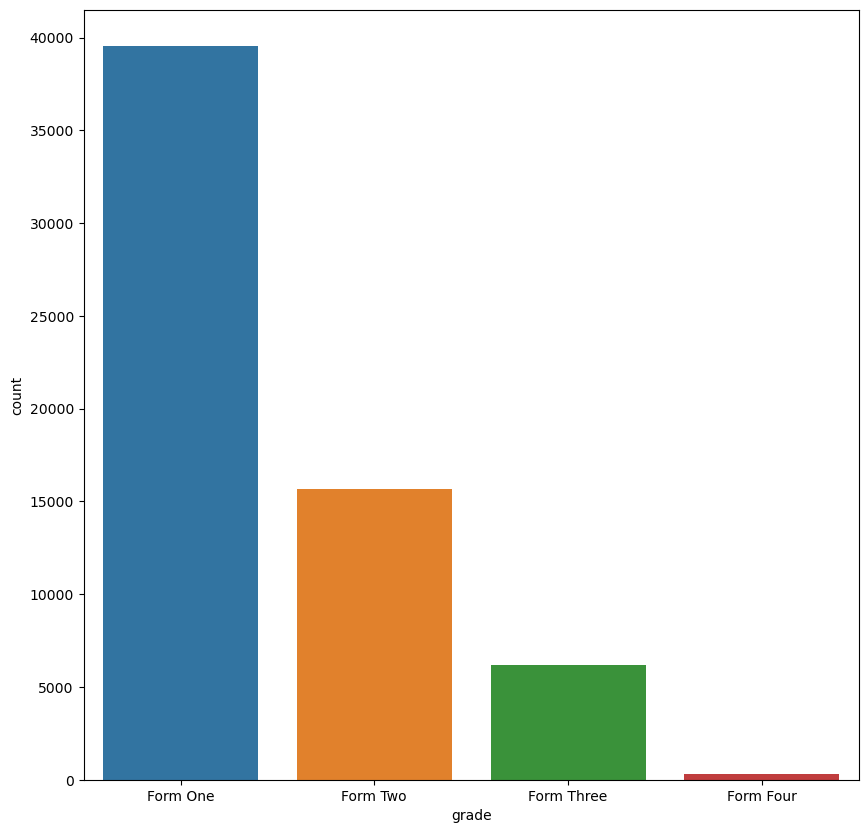

In [39]:
plt.figure(figsize=(10,10))
sns.countplot(x='grade',data=df)
plt.show()

# MeansToSchool

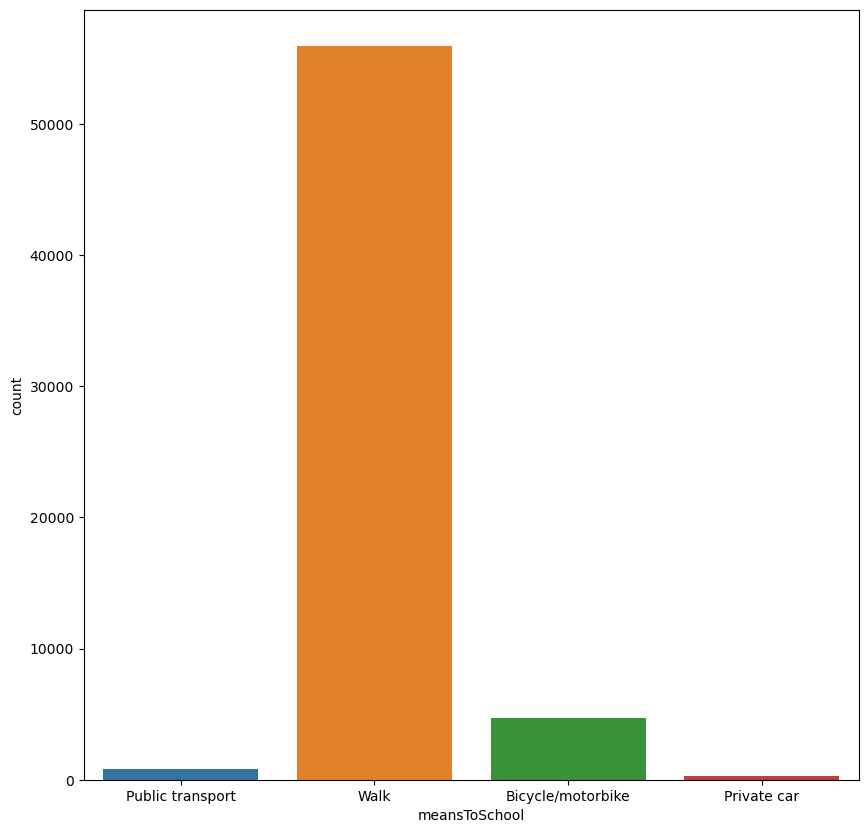

In [40]:
plt.figure(figsize=(10,10))
sns.countplot(x='meansToSchool',data=df)
plt.show()

# hh_children

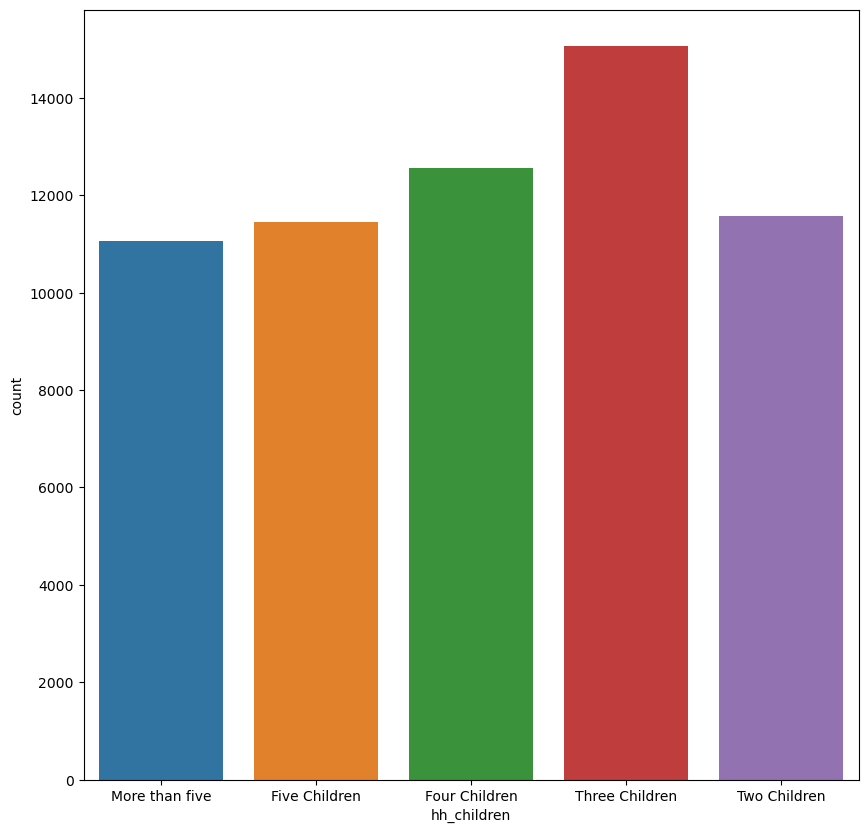

In [41]:
plt.figure(figsize=(10,10))
sns.countplot(x='hh_children',data=df)
plt.show()

# dropout

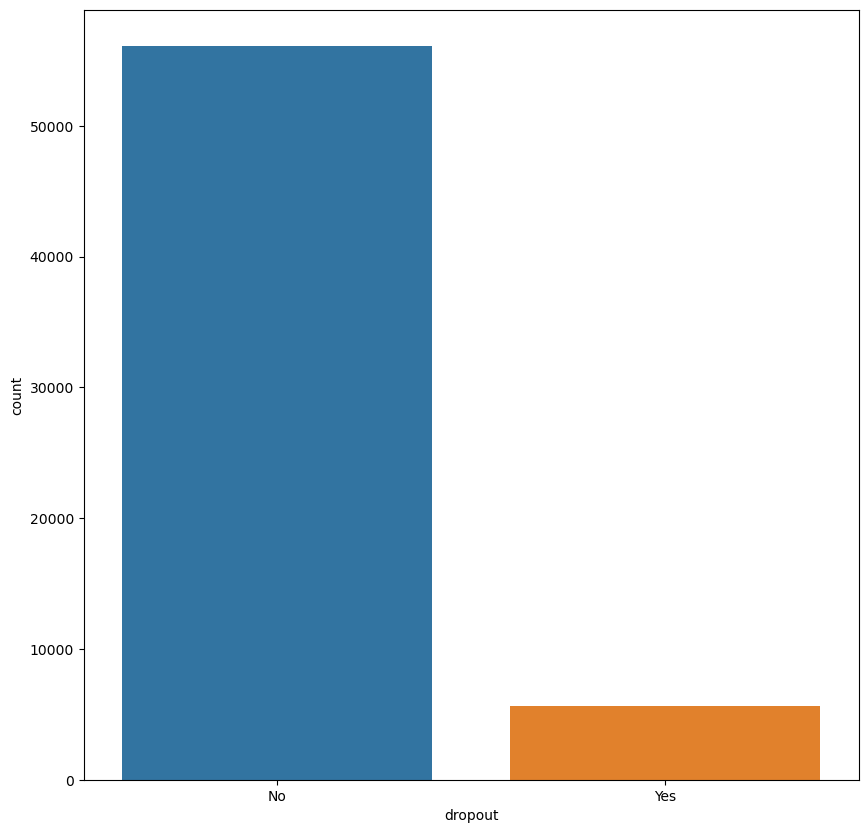

In [42]:
plt.figure(figsize=(10,10))
sns.countplot(x='dropout',data=df)
plt.show()

# Bivariate Analysis

In [43]:
df.columns

Index(['location_name', 'home_language', 'hh_occupation', 'hh_size',
       'school_distanceKm', 'age', 'gender', 'grade', 'meansToSchool',
       'hh_children', 'dropout'],
      dtype='object')

In [44]:
plt.figure(figsize=(4,4))

<Figure size 400x400 with 0 Axes>

<Figure size 400x400 with 0 Axes>

# Relationship between location_name and dropout

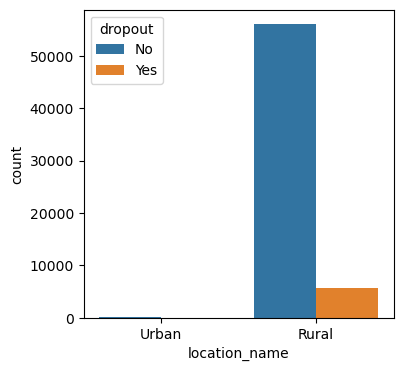

In [45]:
plt.figure(figsize=(4,4))
sns.countplot(x='location_name',hue='dropout',data=df)
plt.show()

In [46]:
c_t=pd.crosstab(df['location_name'].sample(frac=0.02,replace=True,random_state=1).reset_index(drop=True),df['dropout'].sample(frac=0.02,replace=True,random_state=1).reset_index(drop=True))
c_t

dropout,No,Yes
location_name,,
Rural,1127,107
Urban,1,0


In [47]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

stats,p,dof,expected=chi2_contingency(c_t)

if p<=0.05:
    print("dependent(Reject Ho)")
else:
    print('Independent(Accept Ho)')
    
print(p)
print(dof)
print(stats)
print(expected)

Independent(Accept Ho)
1.0
1
0.0
[[1.12708664e+03 1.06913360e+02]
 [9.13360324e-01 8.66396761e-02]]


# Relationship between home_language and dropout

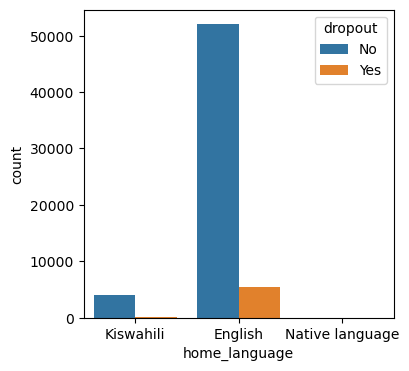

In [48]:
plt.figure(figsize=(4,4))
sns.countplot(x='home_language',hue='dropout',data=df)
plt.show()

# relationship between occupation and dropout

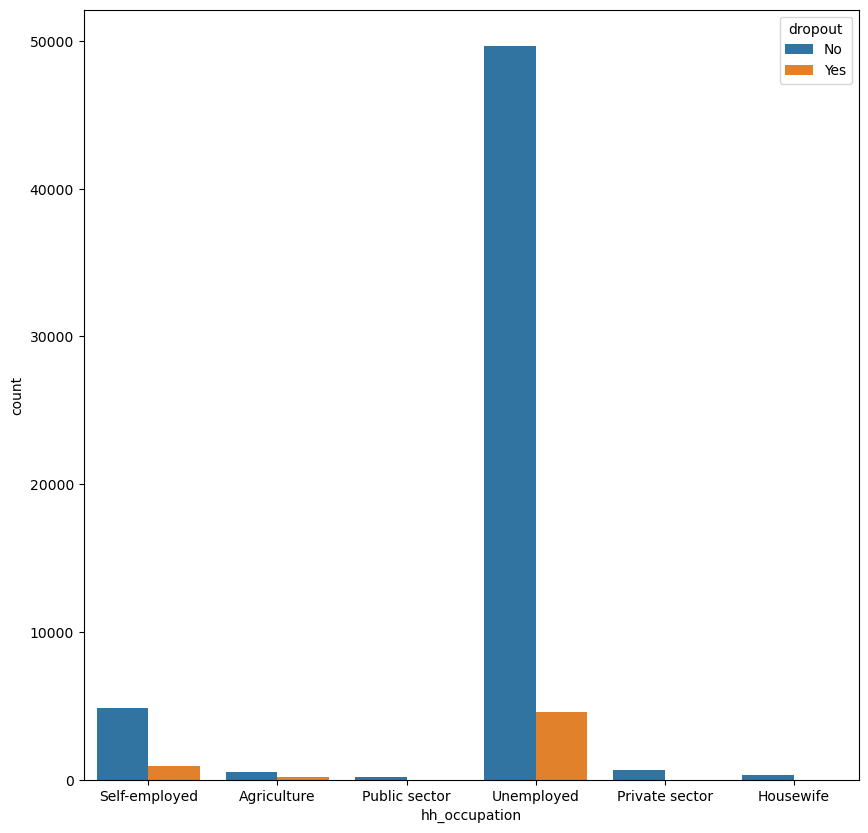

In [49]:
plt.figure(figsize=(10,10))
sns.countplot(x='hh_occupation',hue='dropout',data=df)
plt.show()

In [50]:
c_t=pd.crosstab(df.hh_occupation.sample(frac=0.004,replace=True,random_state=1).reset_index(drop=True),df.dropout.sample(frac=0.004,replace=True,random_state=1).reset_index(drop=True))
c_t

dropout,No,Yes
hh_occupation,,
Agriculture,4,1
Housewife,2,0
Private sector,1,0
Public sector,1,0
Self-employed,18,5
Unemployed,202,13


In [51]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

stats,p,dof,expected=chi2_contingency(c_t)

if p<=0.05:
    print("dependent(Reject Ho)")
else:
    print('Independent(Accept Ho)')

print(p)
print(dof)
print(stats)
print(expected)

Independent(Accept Ho)
0.12560194029902988
5
8.611459386585778
[[4.61538462e+00 3.84615385e-01]
 [1.84615385e+00 1.53846154e-01]
 [9.23076923e-01 7.69230769e-02]
 [9.23076923e-01 7.69230769e-02]
 [2.12307692e+01 1.76923077e+00]
 [1.98461538e+02 1.65384615e+01]]


# Relationship between hh_size and dropout

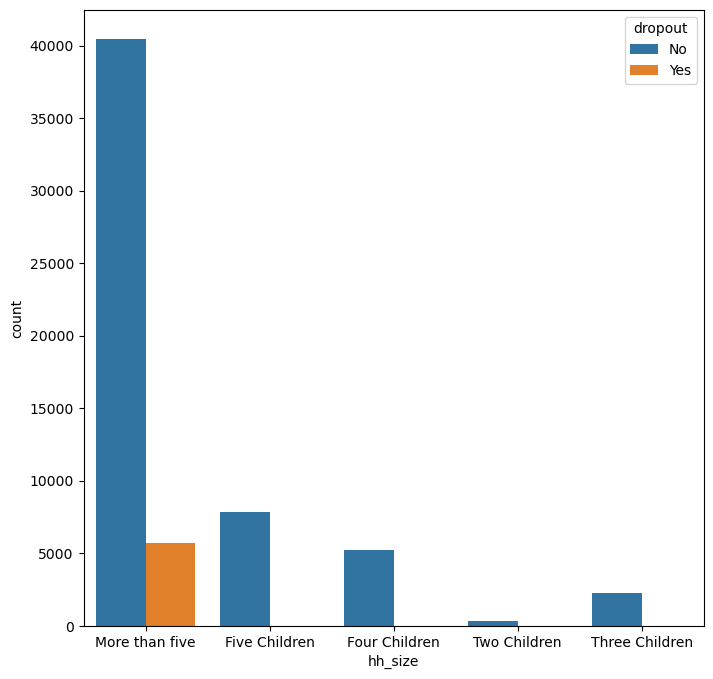

In [52]:
plt.figure(figsize=(8,8))
sns.countplot(x='hh_size',hue='dropout',data=df)
plt.show()

In [53]:
c_t=pd.crosstab(df.hh_size.sample(frac=0.004,replace=True,random_state=1).reset_index(drop=True),df.dropout.sample(frac=0.004,random_state=1,replace=True).reset_index(drop=True))
c_t

dropout,No,Yes
hh_size,,
Five Children,35,0
Four Children,13,0
More than five,170,19
Three Children,10,0


In [54]:
from scipy.stats import chi2
from scipy.stats import chi2_contingency

stats,p,dof,expected=chi2_contingency(c_t)

if p<=0.05:
    print('dependent:reject hypothesis')
else:
    print('accept null hypothesis')
    
print(stats)
print(p)
print(dof)
print(expected)

accept null hypothesis
6.3165784832451495
0.09718375451018227
3
[[ 32.30769231   2.69230769]
 [ 12.           1.        ]
 [174.46153846  14.53846154]
 [  9.23076923   0.76923077]]


# Relationship between school_distancekm and dropout

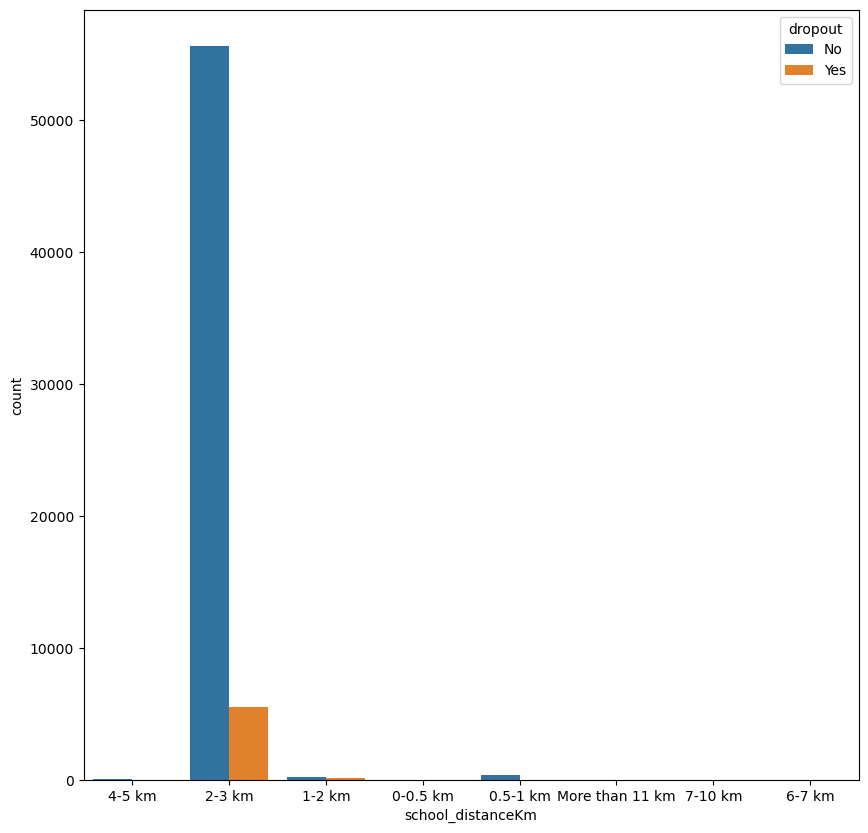

In [55]:
plt.figure(figsize=(10,10))
sns.countplot(x='school_distanceKm',hue='dropout',data=df)
plt.show()

In [56]:
c_t=pd.crosstab(df.school_distanceKm.sample(frac=0.004,replace=True,random_state=1).reset_index(drop=True),df.dropout.sample(frac=0.004,replace=True,random_state=1).reset_index(drop=True))
c_t

dropout,No,Yes
school_distanceKm,,
0.5-1 km,1,0
1-2 km,2,1
2-3 km,225,18


In [57]:
from scipy.stats import chi2_contingency

stats,p,dof,expected=chi2_contingency(c_t)

if p<=0.05:
    print('Dependent:Reject null hypothesis')
else:
    print('Independent:Accept null hypothesis')

print(stats)
print(dof)
print(expected)
print(p)

Independent:Accept null hypothesis
2.888888888888888
2
[[9.23076923e-01 7.69230769e-02]
 [2.76923077e+00 2.30769231e-01]
 [2.24307692e+02 1.86923077e+01]]
0.23587708298570012


# Relationship age between and dropout

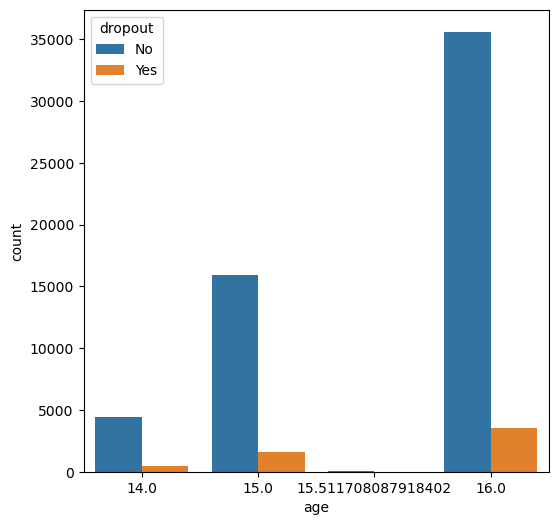

In [58]:
plt.figure(figsize=(6,6))
sns.countplot(x='age',hue='dropout',data=df)
plt.show()

In [59]:
c_t=pd.crosstab(df.age.sample(frac=0.004,replace=True,random_state=1).reset_index(drop=True),df.dropout.sample(frac=0.004,replace=True,random_state=1).reset_index(drop=True))
c_t

dropout,No,Yes
age,,
14.000000,18,2
15.000000,67,3
15.511708,2,0
16.000000,141,14


In [60]:
from scipy.stats import chi2_contingency

stats,p,dof,expected=chi2_contingency(c_t)

if p<=0.05:
    print('Dependent:Reject ho')
else:
    print('Independent:Accept ho')
print(stats)
print(p)
print(dof)
print(expected)

Independent:Accept ho
1.8526497695852533
0.6035453167871991
3
[[ 18.46153846   1.53846154]
 [ 64.61538462   5.38461538]
 [  1.84615385   0.15384615]
 [143.07692308  11.92307692]]


# Relationship between gender and dropout

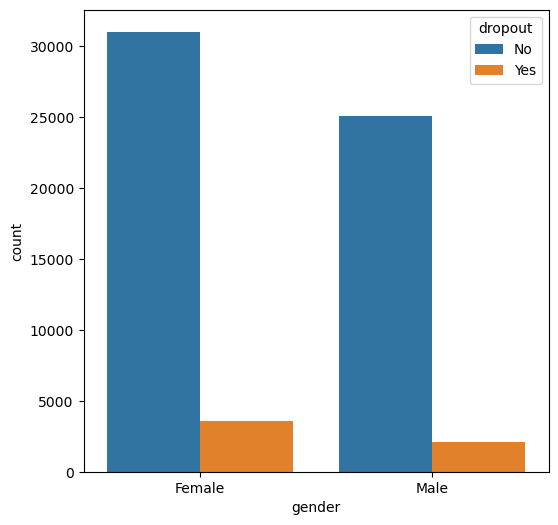

In [61]:
plt.figure(figsize=(6,6))
sns.countplot(x='gender',hue='dropout',data=df)
plt.show()

In [62]:
c_t=pd.crosstab(df.gender.sample(frac=0.004,replace=True,random_state=1).reset_index(drop=True),df.dropout.sample(frac=0.004,replace=True,random_state=1).reset_index(drop=True))
c_t

dropout,No,Yes
gender,,
Female,116,10
Male,112,9


In [63]:
from scipy.stats import chi2_contingency

stats,p,dof,expected=chi2_contingency(c_t)

if p<=0.05:
    print('Dependent:Reject ho')
else:
    print('Independent:Accept ho')
print(stats)
print(p)
print(dof)
print(expected)

Independent:Accept ho
0.0
1.0
1
[[116.30769231   9.69230769]
 [111.69230769   9.30769231]]


# Relationship between grade and dropout

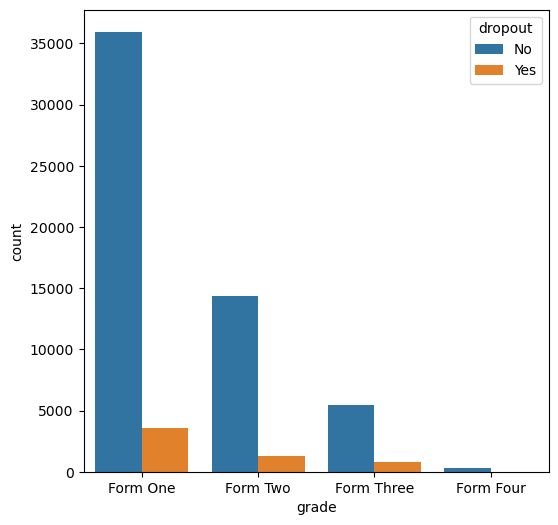

In [64]:
plt.figure(figsize=(6,6))
sns.countplot(x='grade',hue='dropout',data=df)
plt.show()

In [65]:
c_t=pd.crosstab(df.grade.sample(frac=0.004,replace=True,random_state=1).reset_index(drop=True),df.dropout.sample(frac=0.004,replace=True,random_state=1).reset_index(drop=True))
c_t

dropout,No,Yes
grade,,
Form Four,3,0
Form One,136,11
Form Three,21,4
Form Two,68,4


In [66]:
from scipy.stats import chi2_contingency

stats,p,dof,expected=chi2_contingency(c_t)

if p<=0.05:
    print('Dependent:Reject ho')
else:
    print('Independent:Accept ho')
print(stats)
print(p)
print(dof)
print(expected)

Independent:Accept ho
3.152033257747543
0.36877339821605437
3
[[  2.76923077   0.23076923]
 [135.69230769  11.30769231]
 [ 23.07692308   1.92307692]
 [ 66.46153846   5.53846154]]


# Relationship between meansToSchool and dropout

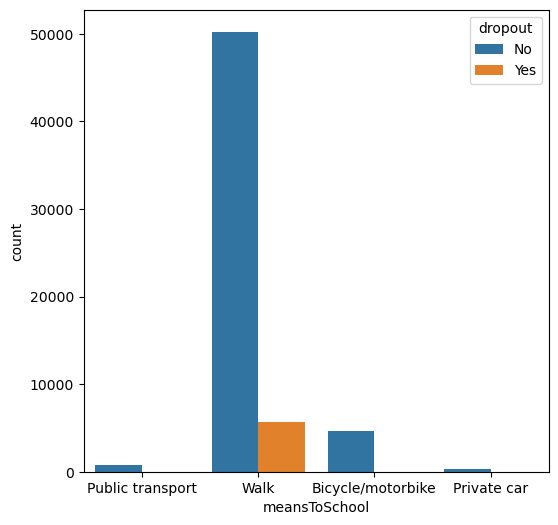

In [67]:
plt.figure(figsize=(6,6))
sns.countplot(x='meansToSchool',hue='dropout',data=df)
plt.show()

In [68]:
c_t=pd.crosstab(df.meansToSchool.sample(frac=0.004,replace=True,random_state=1).reset_index(drop=True),df.dropout.sample(frac=0.004,replace=True,random_state=1).reset_index(drop=True))
c_t

dropout,No,Yes
meansToSchool,,
Bicycle/motorbike,18,0
Private car,1,0
Public transport,4,0
Walk,205,19


In [69]:
from scipy.stats import chi2_contingency

stats,p,dof,expected=chi2_contingency(c_t)

if p<=0.05:
    print('Dependent:Reject ho')
else:
    print('Independent:Accept ho')
print(stats)
print(p)
print(dof)
print(expected)

Independent:Accept ho
2.113467261904762
0.549193053031096
3
[[1.66153846e+01 1.38461538e+00]
 [9.23076923e-01 7.69230769e-02]
 [3.69230769e+00 3.07692308e-01]
 [2.06769231e+02 1.72307692e+01]]


# Relationship hh_children between    and dropout

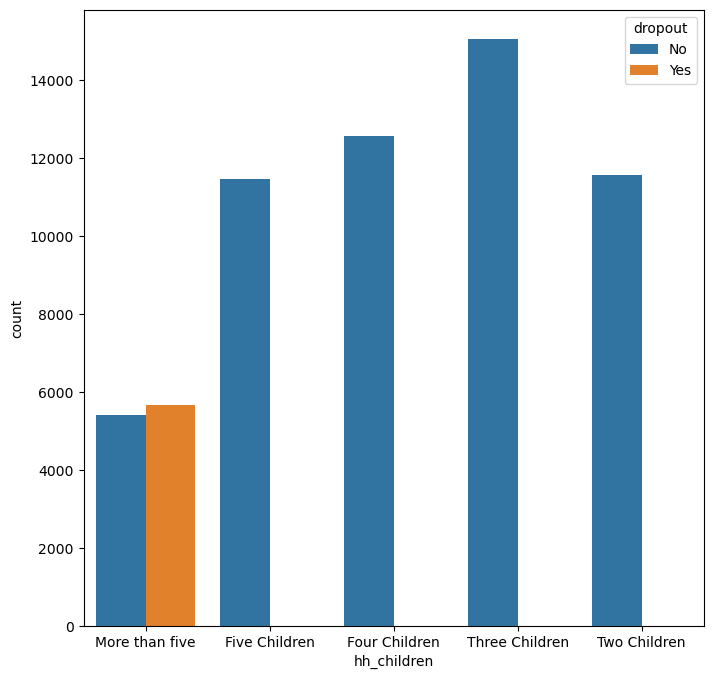

In [70]:
plt.figure(figsize=(8,8))
sns.countplot(x='hh_children',hue='dropout',data=df)
plt.show()

In [71]:
c_t=pd.crosstab(df.hh_children.sample(frac=0.004,replace=True,random_state=1).reset_index(drop=True),df.dropout.sample(frac=0.004,replace=True,random_state=1).reset_index(drop=True))
c_t

dropout,No,Yes
hh_children,,
Five Children,58,0
Four Children,41,0
More than five,23,19
Three Children,60,0
Two Children,46,0


In [72]:
from scipy.stats import chi2_contingency

stats,p,dof,expected=chi2_contingency(c_t)

if p<=0.05:
    print('Dependent:Reject ho')
else:
    print('Independent:Accept ho')
print(stats)
print(p)
print(dof)
print(expected)

Dependent:Reject ho
100.46626984126983
7.826680872787784e-21
4
[[53.53846154  4.46153846]
 [37.84615385  3.15384615]
 [38.76923077  3.23076923]
 [55.38461538  4.61538462]
 [42.46153846  3.53846154]]


In [73]:
df.columns

Index(['location_name', 'home_language', 'hh_occupation', 'hh_size',
       'school_distanceKm', 'age', 'gender', 'grade', 'meansToSchool',
       'hh_children', 'dropout'],
      dtype='object')

# Multivariate analysis between hh_occupation,gender and dropout

In [74]:
pd.crosstab([df.hh_occupation,df.gender],df.dropout)

dropout                   No   Yes
hh_occupation  gender             
Agriculture    Female    172   154
               Male      323     2
Housewife      Female    156     0
               Male      155     0
Private sector Female    464     0
               Male      161     0
Public sector  Female      7     1
               Male      164     0
Self-employed  Female   2486   465
               Male     2331   465
Unemployed     Female  27705  2922
               Male    21942  1656

In [75]:
pd.crosstab([df.hh_occupation.sample(frac=0.004,replace=True,random_state=1).reset_index(drop=True),df.gender.sample(frac=0.004,random_state=1,replace=True).reset_index(drop=True)],df.dropout.sample(frac=0.004,random_state=1,replace=True).reset_index(drop=True))

dropout                 No  Yes
hh_occupation  gender          
Agriculture    Female    1    1
               Male      3    0
Housewife      Female    2    0
Private sector Female    1    0
Public sector  Male      1    0
Self-employed  Female   12    2
               Male      6    3
Unemployed     Female  100    7
               Male    102    6

In [76]:
from scipy.stats import chi2_contingency

stats,p,dof,expected=chi2_contingency(c_t)

if p<=0.05:
    print('Dependent:reject the null hypothesis')
else:
    print('Independent :accept the null hupothesis')

Dependent:reject the null hypothesis


# Machine Learning

In [77]:
df

,location_name,home_language,hh_occupation,hh_size,school_distanceKm,age,gender,grade,meansToSchool,hh_children,dropout
4,Urban,Kiswahili,Self-employed,More than five,4-5 km,15.511708,Female,Form One,Public transport,More than five,No
5,Urban,English,Agriculture,More than five,2-3 km,15.511708,Female,Form One,Public transport,Five Children,No
6,Urban,Kiswahili,Agriculture,Five Children,2-3 km,15.511708,Female,Form Two,Walk,More than five,No
7,Rural,English,Agriculture,More than five,1-2 km,15.511708,Male,Form One,Walk,Four Children,No
8,Rural,English,Agriculture,More than five,4-5 km,15.511708,Female,Form One,Bicycle/motorbike,More than five,No
...,...,...,...,...,...,...,...,...,...,...,...
62734,Rural,English,Unemployed,Four Children,2-3 km,16.000000,Female,Form One,Bicycle/motorbike,Two Children,No
62735,Rural,English,Unemployed,Five Children,2-3 km,16.000000,Male,Form Two,Walk,Two Children,No
62736,Rural,English,Unemployed,More than five,2-3 km,16.000000,Female,Form Three,Walk,Three Children,No
62737,Rural,English,Unemployed,Three Children,2-3 km,16.000000,Female,Form One,Walk,Two Children,No


In [78]:
from sklearn.preprocessing import LabelEncoder

le_location_name=LabelEncoder()
le_home_language=LabelEncoder()
le_hh_occupation=LabelEncoder()
le_hh_size=LabelEncoder()
le_school_distanceKm=LabelEncoder()
le_gender=LabelEncoder()
le_grade=LabelEncoder()
le_meansToSchool=LabelEncoder()
le_hh_children=LabelEncoder()
le_dropout=LabelEncoder()

In [79]:
df['new_location_name']=le_location_name.fit_transform(df['location_name'])
df['new_home_language']=le_home_language.fit_transform(df['home_language'])
df['new_hh_occupation']=le_hh_occupation.fit_transform(df['hh_occupation'])
df['new_hh_size']=le_hh_size.fit_transform(df['hh_size'])
df['new_school_distanceKm']=le_school_distanceKm.fit_transform(df['school_distanceKm'])
df['new_gender']=le_gender.fit_transform(df['gender'])
df['new_grade']=le_gender.fit_transform(df['grade'])
df['new_meansToSchool']=le_meansToSchool.fit_transform(df['meansToSchool'])
df['new_hh_children']=le_hh_children.fit_transform(df['hh_children'])
df['new_dropout']=le_dropout.fit_transform(df['dropout'])
df['new_age']=df['age']

In [80]:
df.drop(['location_name','home_language','hh_occupation','hh_size','school_distanceKm','gender','grade','meansToSchool','hh_children','dropout','age'],axis='columns',inplace=True)
df

,new_location_name,new_home_language,new_hh_occupation,new_hh_size,new_school_distanceKm,new_gender,new_grade,new_meansToSchool,new_hh_children,new_dropout,new_age
4,1,1,4,2,4,0,1,2,2,0,15.511708
5,1,0,0,2,3,0,1,2,0,0,15.511708
6,1,1,0,0,3,0,3,3,2,0,15.511708
7,0,0,0,2,2,1,1,3,1,0,15.511708
8,0,0,0,2,4,0,1,0,2,0,15.511708
...,...,...,...,...,...,...,...,...,...,...,...
62734,0,0,5,1,3,0,1,0,4,0,16.000000
62735,0,0,5,0,3,1,3,3,4,0,16.000000
62736,0,0,5,2,3,0,2,3,3,0,16.000000
62737,0,0,5,3,3,0,1,3,4,0,16.000000


In [81]:
features=df.drop('new_dropout',axis='columns')

In [82]:
target=df['new_dropout']

In [83]:
features

,new_location_name,new_home_language,new_hh_occupation,new_hh_size,new_school_distanceKm,new_gender,new_grade,new_meansToSchool,new_hh_children,new_age
4,1,1,4,2,4,0,1,2,2,15.511708
5,1,0,0,2,3,0,1,2,0,15.511708
6,1,1,0,0,3,0,3,3,2,15.511708
7,0,0,0,2,2,1,1,3,1,15.511708
8,0,0,0,2,4,0,1,0,2,15.511708
...,...,...,...,...,...,...,...,...,...,...
62734,0,0,5,1,3,0,1,0,4,16.000000
62735,0,0,5,0,3,1,3,3,4,16.000000
62736,0,0,5,2,3,0,2,3,3,16.000000
62737,0,0,5,3,3,0,1,3,4,16.000000


In [84]:
target

4        0
5        0
6        0
7        0
8        0
        ..
62734    0
62735    0
62736    0
62737    0
62738    0
Name: new_dropout, Length: 61731, dtype: int32

In [85]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(features,target,test_size=0.2)

In [86]:
from sklearn import tree
model=tree.DecisionTreeClassifier()
model.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [87]:
model.predict([[1,0,0,2,3,0,1,2,0,15.511708]])

array([0])

In [88]:
from sklearn.ensemble import RandomForestClassifier

In [89]:
random_model=RandomForestClassifier(n_estimators=10)
random_model.fit(xtrain,ytrain)

RandomForestClassifier(n_estimators=10)

In [90]:
random_model.score(xtest,ytest)

0.9466267109419292

In [91]:
random_model.predict([[1,0,0,2,3,0,1,2,0,15.511708]])

array([0])